# ML

Машинное обучение — это наука, изучающая алгоритмы, автоматически улучшающиеся благодаря опыту. Задачи бывают разные об одной из них мы сегодня с вами поговорим  

У всех задач ML есть много общего. Одно из того что это всё объединяет - объекты, примеры, признаки (samples/features) и предсказания (targets) в которые мы наши признаки хотим превратить.  

# Классификация

<img src='https://evergreens.com.ua/assets/images/articles/Kudelya-images/ml/classifier.jpg'>

Если в задаче __регрессии__ наши targets это вещественное число, например: предсказание продолжительности поездки на каршеринге, спрос на конкретный товар в конкретный день, или например цена квартиры.  
То в задаче __классификации__ наши targets - это какое-то определённое конечное множество ответов из которого мы должны выбрать правильное или правильные.

## Существует несколько типов классификации

$$Y= (0,1)$$ — бинарная классификация. Например, мы можем предсказывать, кликнет ли пользователь по рекламному объявлению, вернёт ли клиент кредит в установленный срок, сдаст ли студент сессию, случится ли определённое заболевание у пациента, есть ли на картинке банан.

$$Y= (1, … ,K)$$ — многоклассовая (multiclass) классификация. Например, определение предметной области для научной статьи (математика, биология, психология и т. д.).
$$Y = (0,1)^K$$

  — многоклассовая классификация с пересекающимися классами (multilabel classification). Например, задача автоматического проставления тегов для ресторанов (логично, что ресторан может одновременно иметь несколько тегов).

$$где$$

$$K$$  - количество классов

# Метрики классификации

<img src='https://t1.daumcdn.net/thumb/R1280x0/?fname=http://t1.daumcdn.net/brunch/service/user/4SKt/image/VwzVj8EgnrXLgUcZcs_seAUWEQg.png'>

Accuracy (точность). Это доля правильно предсказанных классов ко всем предсказаниям. Она проста в понимании, но может быть неинформативной при несбалансированных классах.  

Precision (точность). Показывает, какая доля предсказанных положительных примеров действительно являются положительными. Это важно в задачах, где ложноположительные ошибки могут быть дорогостоящими, например, в медицинской диагностике.  
    
Recall (полнота). Измеряет, какую долю реальных положительных примеров модель смогла правильно предсказать. Это важно в задачах, где пропуск положительных примеров может быть критичным, например, в обнаружении мошенничества.  
    
F1-Score. Это гармоническое среднее между Precision и Recall. Используется, когда важно учитывать как ложноположительные, так и ложноотрицательные ошибки. F1-Score особенно полезен в задачах с несбалансированными классами, где простая точность может быть вводящей в заблуждение

<Axes: >

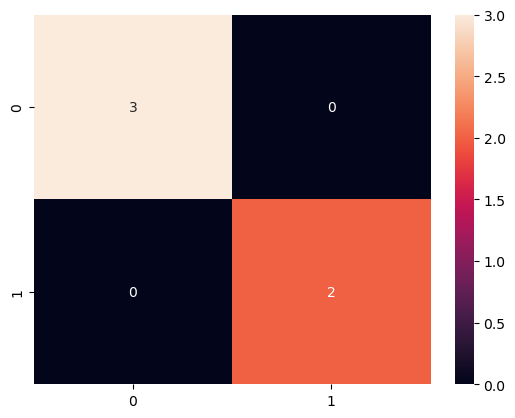

In [61]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_true = [0,1,1,0,0]
y_pred = [0,1,1,0,0]
sns.heatmap(confusion_matrix(y_true, y_pred, ),annot=True)

In [63]:
from sklearn.datasets import load_breast_cancer
import seaborn as sns
the_data = load_breast_cancer()

# 0 — «доброкачественный» 
# 1 — «злокачественный» 
relabeled_target = 1 - the_data["target"] 

from sklearn.model_selection import train_test_split 
X = the_data["data"] 
y = relabeled_target 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

from sklearn.dummy import DummyClassifier
dc_mf = DummyClassifier(strategy="most_frequent") 
dc_mf.fit(X_train, y_train)


y_true = y_test 
y_pred = dc_mf.predict(X_test) 
dc_mf_tn, dc_mf_fp, dc_mf_fn, dc_mf_tp = confusion_matrix(y_true, y_pred, labels = [0, 1]).ravel()

In [65]:
y_true

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [67]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(50.722222222222214, 0.5, 'TRUE')

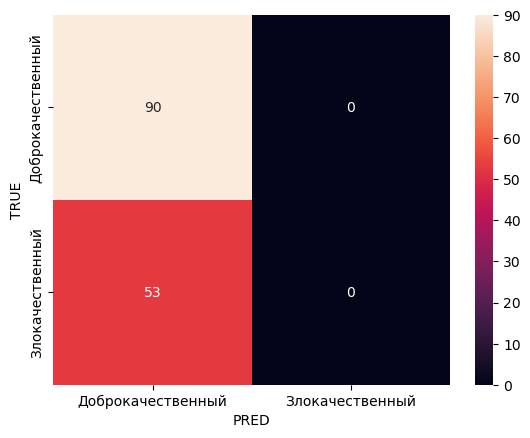

In [85]:

sns.heatmap(confusion_matrix(y_true, y_pred),annot=True)
plt.xticks([0.5,1.5],['Доброкачественный','Злокачественный'])
plt.yticks([0.5,1.5],['Доброкачественный','Злокачественный'])
plt.xlabel('PRED')
plt.ylabel('TRUE')

In [9]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [11]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()       
rfc.fit(X_train, y_train)       
y_true = y_test       
y_pred = rfc.predict(X_test)       
rfc_tn, rfc_fp, rfc_fn, rfc_tp = confusion_matrix(y_true, y_pred, labels = [0, 1]).ravel()

<Axes: >

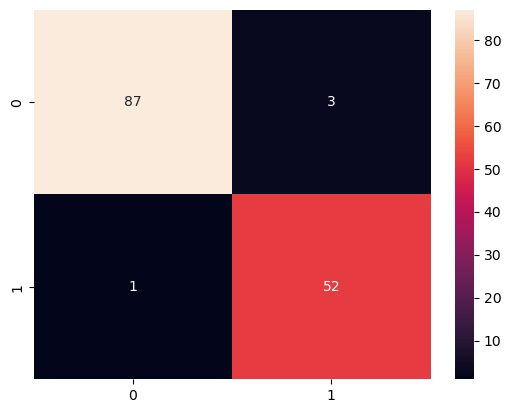

In [15]:
sns.heatmap(confusion_matrix(y_true, y_pred, labels = [0, 1]),annot=True)

In [17]:
(87+52)/(87+3+1+52)

0.972027972027972

In [19]:
y_true

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [21]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        90
           1       0.95      0.98      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [97]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        90
           1       0.00      0.00      0.00        53

    accuracy                           0.63       143
   macro avg       0.31      0.50      0.39       143
weighted avg       0.40      0.63      0.49       143



D:\hran\anacondaz\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\hran\anacondaz\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\hran\anacondaz\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Пример

<img src='https://storage.googleapis.com/kaggle-datasets-images/5737131/9440913/0f61cb59f033e09e3a8d9f1474050ede/dataset-cover.jpg?t=2024-09-20-08-02-56'>

https://www.kaggle.com/datasets/taweilo/fish-species-sampling-weight-and-height-data/data

In [123]:
import pandas as pd
df = pd.read_csv('./fish_data.csv')
df

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


In [125]:
df['species'].unique()

array(['Anabas testudineus', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Sillaginopsis panijus'], dtype=object)

In [127]:
df.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [129]:
df.duplicated().sum()

109

In [131]:
df = df.drop_duplicates()
df.reset_index(drop=True,inplace=True)
df

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
3966,Sillaginopsis panijus,30.61,6.08,0.20
3967,Sillaginopsis panijus,30.56,6.12,0.20
3968,Sillaginopsis panijus,29.66,6.11,0.21
3969,Sillaginopsis panijus,32.81,6.25,0.19


In [133]:
df.isna().sum()

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64

In [141]:
df.loc[:,'species']

0       0
1       0
2       0
3       0
4       0
       ..
3966    8
3967    8
3968    8
3969    8
3970    8
Name: species, Length: 3971, dtype: int64

In [139]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.loc[:,'species'] = le.fit_transform(df.loc[:,'species'])
df

C:\Users\nicka\AppData\Local\Temp\ipykernel_15376\3494851539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'species'] = le.fit_transform(df.loc[:,'species'])


,species,length,weight,w_l_ratio
0,0,10.66,3.45,0.32
1,0,6.91,3.27,0.47
2,0,8.38,3.46,0.41
3,0,7.57,3.36,0.44
4,0,10.83,3.38,0.31
...,...,...,...,...
3966,8,30.61,6.08,0.20
3967,8,30.56,6.12,0.20
3968,8,29.66,6.11,0.21
3969,8,32.81,6.25,0.19


In [143]:
le.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [147]:
X = df.drop(columns='species')
y = df.species

In [149]:
X

,length,weight,w_l_ratio
0,10.66,3.45,0.32
1,6.91,3.27,0.47
2,8.38,3.46,0.41
3,7.57,3.36,0.44
4,10.83,3.38,0.31
...,...,...,...
3966,30.61,6.08,0.20
3967,30.56,6.12,0.20
3968,29.66,6.11,0.21
3969,32.81,6.25,0.19


In [151]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3966    8
3967    8
3968    8
3969    8
3970    8
Name: species, Length: 3971, dtype: int64

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [155]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)                      

DecisionTreeClassifier(random_state=0)

In [171]:
len(y_true)

795

<Axes: >

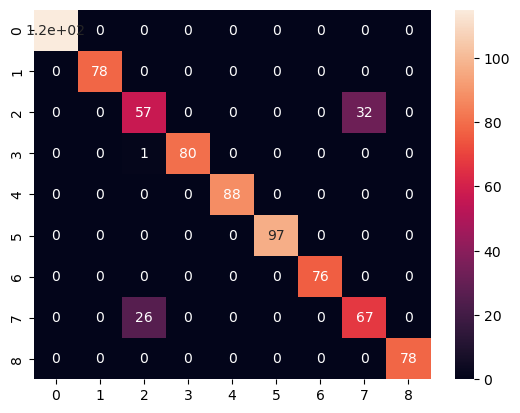

In [173]:
y_pred = clf.predict(X_test)
y_true = y_test
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True)

In [165]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        78
           2       0.68      0.64      0.66        89
           3       1.00      0.99      0.99        81
           4       1.00      1.00      1.00        88
           5       1.00      1.00      1.00        97
           6       1.00      1.00      1.00        76
           7       0.68      0.72      0.70        93
           8       1.00      1.00      1.00        78

    accuracy                           0.93       795
   macro avg       0.93      0.93      0.93       795
weighted avg       0.93      0.93      0.93       795



<Axes: >

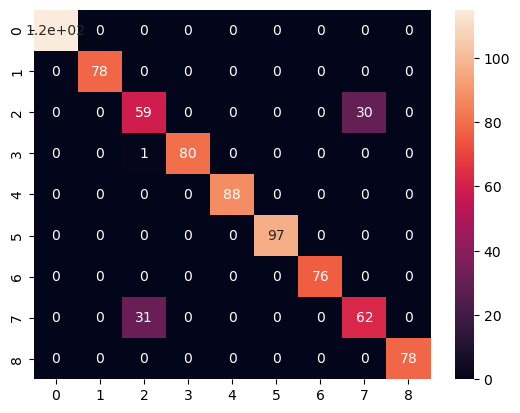

In [175]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()       
rfc.fit(X_train, y_train)       
y_true = y_test       
y_pred = rfc.predict(X_test)
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True)

In [177]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        78
           2       0.65      0.66      0.66        89
           3       1.00      0.99      0.99        81
           4       1.00      1.00      1.00        88
           5       1.00      1.00      1.00        97
           6       1.00      1.00      1.00        76
           7       0.67      0.67      0.67        93
           8       1.00      1.00      1.00        78

    accuracy                           0.92       795
   macro avg       0.92      0.92      0.92       795
weighted avg       0.92      0.92      0.92       795



<Axes: >

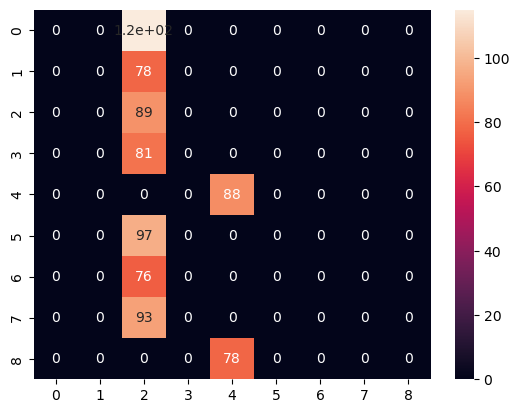

In [189]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_true = y_test
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True)

In [191]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       115
           1       0.00      0.00      0.00        78
           2       0.14      1.00      0.25        89
           3       0.00      0.00      0.00        81
           4       0.53      1.00      0.69        88
           5       0.00      0.00      0.00        97
           6       0.00      0.00      0.00        76
           7       0.00      0.00      0.00        93
           8       0.00      0.00      0.00        78

    accuracy                           0.22       795
   macro avg       0.07      0.22      0.10       795
weighted avg       0.07      0.22      0.10       795



D:\hran\anacondaz\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\hran\anacondaz\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\hran\anacondaz\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Домашнее задание

Используя представленные тут методы, использовать несколько классификационных моделей на проанализированных данных о клиентах банка и их карточках. Сравнить их и выбрать наилучшую. 